In [1]:
import pandas as pd
import numpy as np
import pydicom

import pickle
import os
import matplotlib.pyplot as plt

import pickle
import os
import warnings


In [2]:

X = np.load("../data/processed/X.npy")
y = np.load("../data/processed/y.npy")
x_t = np.load("../data/processed/X_t.npy")

In [3]:
def get_image_patch(img_array, coords, padding=32):


    """ Description
    :type img_array: numpy array
    :param img_array: a image comprised of a numpy array

    :type coords: list(i,j)
    :param coords: The coordinates where the crop will be centered, of type (i,j), i being the columns and j the row

    :type padding: int or list(x,y)
    :param padding: The padding that will be around the center coordinates. If an int, it will create a square image. If a list x is the horizontal padding and y the vertical

    :raises:

    :rtype:
     """

    i = coords[0]
    j = coords[1]

    if isinstance(padding, list):
        h_padding = padding[0]
        v_padding = padding[1]
    else:
        h_padding = padding
        v_padding = padding

    X_ = img_array[j - v_padding: j + v_padding, i - h_padding: i + h_padding]
    # NUMPY ARRAYs are of standart (row, columns)

    return X_

In [2]:
base_path = "../data/interim/train/"

metadata = pd.read_csv("../data/interim/train_information.csv")
metadata = metadata.apply(pd.to_numeric,errors='ignore')
metadata = metadata[metadata.DCMSerDescr.str.contains('sag') & metadata.DCMSerDescr.str.contains('t2')]

X = []
y = []

In [117]:
for row in metadata.itertuples():
    exam_path =  os.path.join(base_path, row.ProxID, row.DCMSerDescr)
    
    exam_file_list = os.listdir(exam_path)

    for file in exam_file_list:
        file_path = os.path.join(exam_folder, file)
        print(file_path)

        img_file = pydicom.read_file(file_path)

        if((img_file.InstanceNumber -1) == row.k):
            print("Match Found")
            continue
    
    print(Match Not found)
    print("{} {}".format(row.ProxID, row.DCMSerDescr))
    
    

    try:
        img_array = pydicom.read_file(img_path).pixel_array
    except:
        continue
    
    

    X_ = get_image_patch(img_array, (row.i, row.j), padding=64)
    
    if(X_.shape == (128,128)):
        y_ = 1 if row.ClinSig else 0

        X.append(X_)
        y.append(y_)

In [112]:
len(X)

449

In [5]:
for row in metadata.itertuples():
    file_name = str(row.k).zfill(6) + '.dcm'

    img_path = os.path.join(base_path, row.ProxID, row.DCMSerDescr)

In [38]:
row = metadata[metadata.ProxID == "ProstateX-0002"].iloc[3]
row

Unnamed: 0                                                             41
ProxID                                                     ProstateX-0002
Name                                                          t2_tse_sag0
fid                                                                     1
pos                                             -27.0102 41.5467 -26.0469
WorldMatrix             0,0,-3.6,26.4892,0.5625,0,0,-61.2349,0,-0.5625...
ijk                                                            183 154 15
TopLevel                                                                1
SpacingBetweenSlices                                                  3.6
VoxelSpacing                                            0.5625,0.5625,3.6
Dim                                                          320x320x19x1
DCMSerDescr                                                    t2_tse_sag
DCMSerNum                                                               3
zone                                  

In [41]:
exam_path =  os.path.join(base_path, row.ProxID, row.DCMSerDescr)
exam_path

'../data/interim/train/ProstateX-0002/t2_tse_sag'

In [3]:
for row in metadata.itertuples():
    exam_path =  os.path.join(base_path, row.ProxID, row.DCMSerDescr)
    
    exam_file_list = os.listdir(exam_path)
    
    #print("Starting to look for {}, {}".format(row.ProxID, row.DCMSerDescr))

    for file in exam_file_list:
        file_path = os.path.join(exam_path, file)

        img_file = pydicom.read_file(file_path)

        if((img_file.InstanceNumber -1) == row.k):
            print("Match Found")
            break

Starting to look for ProstateX-0000, t2_tse_sag
Match Found
Starting to look for ProstateX-0001, t2_loc sag
Starting to look for ProstateX-0001, t2_tse_sag
Match Found
Starting to look for ProstateX-0002, t2_loc sag
Match Found
Starting to look for ProstateX-0002, t2_tse_sag
Match Found
Starting to look for ProstateX-0002, t2_loc sag
Starting to look for ProstateX-0002, t2_tse_sag
Match Found
Starting to look for ProstateX-0003, t2_tse_sag
Match Found
Starting to look for ProstateX-0003, t2_tse_sag
Match Found
Starting to look for ProstateX-0004, t2_tse_sag
Match Found
Starting to look for ProstateX-0005, t2_tse_sag
Match Found
Starting to look for ProstateX-0005, t2_tse_sag
Match Found
Starting to look for ProstateX-0005, t2_tse_sag
Match Found
Starting to look for ProstateX-0006, t2_loc sag
Match Found
Starting to look for ProstateX-0006, t2_tse_sag
Match Found
Starting to look for ProstateX-0006, t2_loc sag
Match Found
Starting to look for ProstateX-0006, t2_tse_sag
Match Found
Star

FileNotFoundError: [Errno 2] No such file or directory: '../data/interim/train/ProstateX-0203/t2_tse_sag'

In [6]:
path = '/home/paulo/Projects/thesis/prostatex/data/interim/train/ProstateX-0002/t2_loc sag/'

   
exam_file_list = os.listdir(path)

for file in exam_file_list:
    file_path = os.path.join(path, file)
    
    tmp_file = pydicom.read_file(file_path)
    print("----")
    print(file)
    print(tmp_file.InstanceNumber - 1)

----
000002.dcm
0
----
000001.dcm
1
----
000000.dcm
2


In [7]:
import SimpleITK

def load_dicom_series(input_dir):
    """Reads an entire DICOM series of slices from 'input_dir' and returns its pixel data as an array."""

    reader = SimpleITK.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(input_dir)
    reader.SetFileNames(dicom_names)
    dicom_series = reader.Execute()
    return SimpleITK.GetArrayFromImage(dicom_series)

In [8]:
f = load_dicom_series(path)

In [9]:
f.shape

(3, 256, 256)

In [20]:
f_ = np.moveaxis(f, 0, -1)
f_.shape


(256, 256, 3)

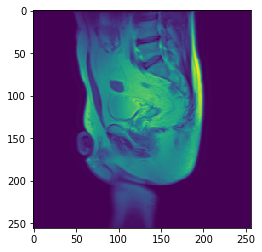

In [21]:
plt.imshow(f_[:,:,0])

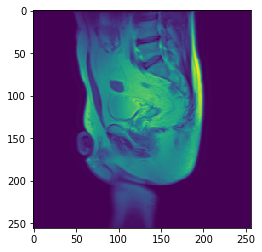

In [19]:
plt.imshow(f[0,:,:])

In [24]:
reader = SimpleITK.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(path)
reader.SetFileNames(dicom_names)
dicom_series = reader.Execute()

In [28]:
dicom_series

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7f40bf055a50> >